In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [33]:
yf.pdr_override()
df = pdr.get_data_yahoo('AAPL', start='2010-01-01', end='2019-12-31')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505279,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401016,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


In [34]:
df=df.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505279,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401016,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


In [35]:
df=df.drop(['Date','Adj Close'],axis=1)

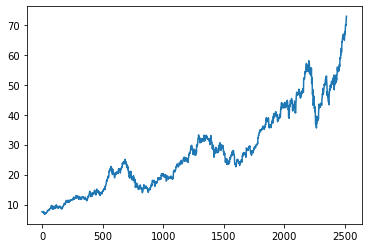

In [36]:
plt.plot(df.Close)

In [42]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

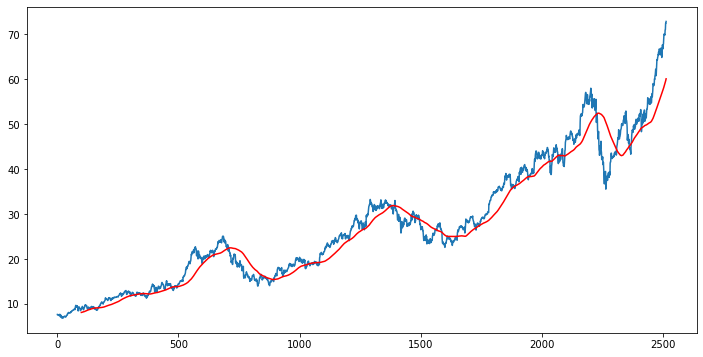

In [43]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [44]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

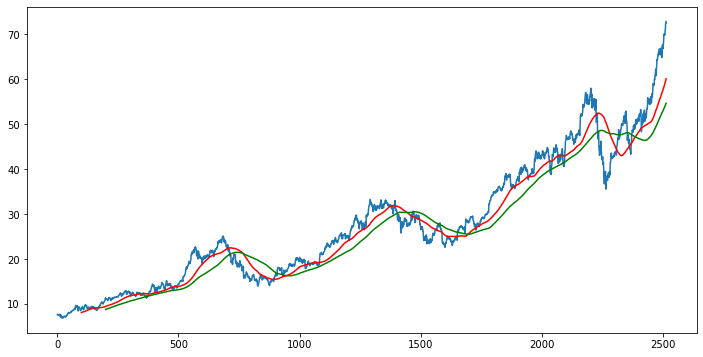

In [45]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [46]:
df.shape

(2515, 5)

In [48]:
data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [51]:
print(data_train.shape)
print(data_test.shape)

(1760, 1)
(755, 1)


In [54]:
scaler=MinMaxScaler(feature_range=(0,1))

In [56]:
data_train_arr=scaler.fit_transform(data_train)
data_train_arr.shape[0]

1760

In [57]:
x_train=[]
y_train=[]


for i in range(100,data_train_arr.shape[0]):
    x_train.append(data_train_arr[i-100:i])
    y_train.append(data_train_arr[i,0])

In [58]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [60]:
x_train.shape

(1660, 100, 1)

In [63]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [67]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 87s 1s/step - loss: 0.0709
Epoch 2/50
52/52 [==============================] - 74s 1s/step - loss: 0.0127
Epoch 3/50
52/52 [==============================] - 74s 1s/step - loss: 0.0097
Epoch 4/50
52/52 [==============================] - 75s 1s/step - loss: 0.0116
Epoch 5/50
52/52 [==============================] - 75s 1s/step - loss: 0.0084
Epoch 6/50
52/52 [==============================] - 74s 1s/step - loss: 0.0089
Epoch 7/50
52/52 [==============================] - 74s 1s/step - loss: 0.0080
Epoch 8/50
52/52 [==============================] - 52s 996ms/step - loss: 0.0083
Epoch 9/50
52/52 [==============================] - 34s 654ms/step - loss: 0.0077
Epoch 10/50
52/52 [==============================] - 35s 674ms/step - loss: 0.0077
Epoch 11/50
52/52 [==============================] - 31s 593ms/step - loss: 0.0073
Epoch 12/50
52/52 [==============================] - 33s 627ms/step - loss: 0.0072
Epoch 13/50
52/52 [===============

In [68]:
model.save('keras_model.h5')

In [70]:
past_100_days=data_train.tail(100)

In [71]:
final_df=past_100_days.append(data_test,ignore_index=True)

In [72]:
input_data=scaler.fit_transform(final_df)
input_data.shape

(855, 1)

In [73]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [74]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [75]:
y_pred=model.predict(x_test)

24/24 [==============================] - 3s 86ms/step


In [76]:
y_pred.shape

(755, 1)

In [79]:
scaler.scale_

array([0.02123255])

In [80]:
scale_factor=1/0.02123255

y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

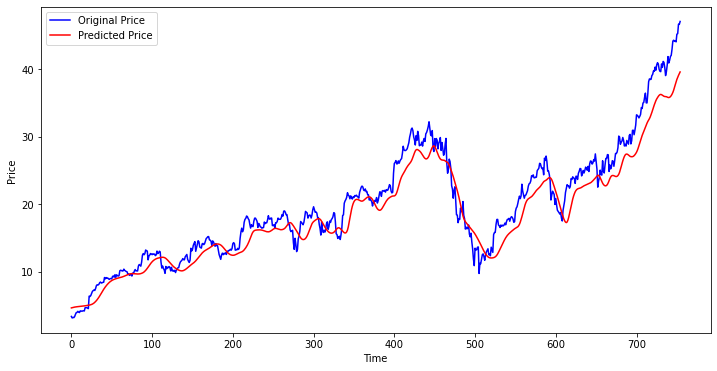

In [81]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="Original Price")
plt.plot(y_pred,'r',label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()